In [1]:
import os
vipshome = 'c:\\vips-dev-8.9\\bin'
os.environ['PATH'] = vipshome + ';' + os.environ['PATH']

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pyvips
from fitter import Fitter
# Fitter?


In [10]:
img = cv2.imread("3.bmp", 0)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

cv2.imwrite('clahe_3.bmp',cl1)

True

In [11]:
x = pyvips.Image.new_from_file("3.bmp")
x = x.hist_equal()
x.write_to_file("vips_3.bmp")

In [33]:
def normalize_image(a):
    im_shape = a.shape
    a = a.flatten()
    normArr = []
    normArr.append(a[0])
    for i in range(len(a) - 1):
        z = int(a[i + 1]) - int(a[i])
        normArr.append(z)
    minArr = abs(min(normArr))
    for i in range(len(normArr)):
        normArr[i] += minArr
    return np.array(normArr).reshape(im_shape)

In [34]:
raw_data = cv2.imread("1_1.bmp", cv2.IMREAD_GRAYSCALE)
norm_img = normalize_image(raw_data)

In [35]:
cv2.imwrite("1_1_norm.bmp", norm_img)

True

In [26]:
print(im_shape, data.shape)

(40, 100) (40, 100)


### kstwobign(\*args, \*\*kwds)     Kolmogorov-Smirnov two-sided test for large N.
### rayleigh(\*args, \*\*kwds)     A Rayleigh continuous random variable.
### rice(\*args, \*\*kwds)     A Rice continuous random variable.
### genlogistic(\*args, \*\*kwds)     A generalized logistic continuous random variable.
### expon(\*args, \*\*kwds)     An exponential continuous random variable.
### norminvgauss(\*args, \*\*kwds)     A Normal Inverse Gaussian continuous random variable.
### norm(\*args, \*\*kwds)     A normal continuous random variable.

Fitted norm distribution with error=0.0018795753071423592)
Fitted kstwobign distribution with error=0.0014876636267186687)
Fitted rayleigh distribution with error=0.0026422601674896454)
Fitted rice distribution with error=0.09444641662315141)
Fitted genlogistic distribution with error=0.0013863694674273743)
Fitted norminvgauss distribution with error=0.0014062897584288844)


,sumsquare_error,aic,bic,kl_div
genlogistic,0.001386,1247.188697,-46580.432793,inf
norminvgauss,0.001406,1287.235970,-46526.971770,inf
kstwobign,0.001488,1288.827665,-46364.108454,inf
norm,0.001880,1444.102588,-45620.032765,inf
rayleigh,0.002642,1172.669654,-44536.279126,inf


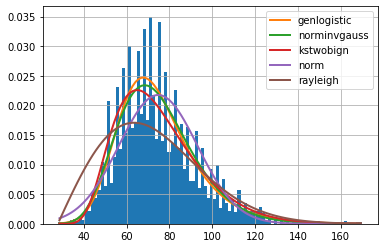

In [3]:
raw_data = cv2.imread("roi_1_9.bmp", cv2.IMREAD_GRAYSCALE)
data = raw_data.flatten()



f = Fitter(data, distributions=['norm', 'kstwobign', 'rayleigh', 'rice', 'genlogistic', 'norminvgauss'])
f.fit()
f.summary()